In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install requests


In [ ]:
import io
import pandas as pd

filename = next(iter(images))
df = pd.read_csv(io.BytesIO(images[filename]))

#Loading the df and checking if it has loaded properly
print(df.head())

   Unnamed: 0                                          image_url  \
0           1  https://img.a.transfermarkt.technology/portrai...   
1           2  https://img.a.transfermarkt.technology/portrai...   
2           3  https://img.a.transfermarkt.technology/portrai...   
3           4  https://img.a.transfermarkt.technology/portrai...   
4           5  https://img.a.transfermarkt.technology/portrai...   

         sub_position  position   foot  
0  Attacking Midfield  Midfield   left  
1  Attacking Midfield  Midfield   left  
2    Central Midfield  Midfield  right  
3    Central Midfield  Midfield  right  
4         Centre-Back  Defender  right  


In [ ]:
images = df.dropna()
images.head()


Unnamed: 0                                          image_url  \
0           1  https://img.a.transfermarkt.technology/portrai...   
1           2  https://img.a.transfermarkt.technology/portrai...   
2           3  https://img.a.transfermarkt.technology/portrai...   
3           4  https://img.a.transfermarkt.technology/portrai...   
4           5  https://img.a.transfermarkt.technology/portrai...   

         sub_position  position   foot  
0  Attacking Midfield  Midfield   left  
1  Attacking Midfield  Midfield   left  
2    Central Midfield  Midfield  right  
3    Central Midfield  Midfield  right  
4         Centre-Back  Defender  right

In [ ]:
image_url = images['url']
image_url

0     https://www.transfermarkt.co.uk/ghayas-zahid/p...
1     https://www.transfermarkt.co.uk/andrey-vlasov/...
2     https://www.transfermarkt.co.uk/olberdam/profi...
3     https://www.transfermarkt.co.uk/antonis-bourse...
4     https://www.transfermarkt.co.uk/thibau-loeman/...
5     https://www.transfermarkt.co.uk/frederic-brill...
6     https://www.transfermarkt.co.uk/timo-werner/pr...
7     https://www.transfermarkt.co.uk/nicolas-careca...
8     https://www.transfermarkt.co.uk/aleksandrs-cau...
9     https://www.transfermarkt.co.uk/cyril-jeunecha...
10    https://www.transfermarkt.co.uk/ufuk-ceylan/pr...
11    https://www.transfermarkt.co.uk/benjamin-lecom...
12    https://www.transfermarkt.co.uk/steven-pienaar...
13    https://www.transfermarkt.co.uk/josh-todd/prof...
14    https://www.transfermarkt.co.uk/philippe-couti...
15    https://www.transfermarkt.co.uk/yaya-soumahoro...
16    https://www.transfermarkt.co.uk/yaroslav-ovsya...
17    https://www.transfermarkt.co.uk/jamilu-col

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import glob
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!ls "/content/drive/MyDrive/Images_MachineLearning"

In [ ]:
data_dir = "/content/drive/MyDrive/CogSci-Gradu-Images/pol_images_2023"

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

In [ ]:
#initial parameters
batch_size = 32
img_heigth = 128
img_width = 128

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_heigth, img_width),
    batch_size=batch_size
)

In [ ]:
from tensorflow._api.v2 import data
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_heigth, img_width),
    batch_size = batch_size
)

In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i +1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_heigth, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
!mkdir -p saved_model
model.save('saved_model/berg_makela_hakli_pol_model2023')
new_model = tf.keras.models.load_model('/content/saved_model/berg_makela_hakli_pol_model2023')
new_model.summary()

In [ ]:
new_model = tf.keras.models.load_model('/content/saved_model/berg_makela_hakli_pol_model2023')
new_model.summary()

OSError: No file or directory found at /content/saved_model/berg_makela_hakli_pol_model2023

In [ ]:
#evaluate restored model if needed
loss, acc = new_model.evaluate(images, labels, verbose=2)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
!ls "/content/drive/MyDrive/CogSci-Gradu-Images/friends/"

In [ ]:
test_dir = "/content/drive/MyDrive/CogSci-Gradu-Images/friends/"

In [ ]:
test_dir = pathlib.Path(test_dir)

In [ ]:
image_count = len(list(test_dir.glob('*/*.jpg')))
print(image_count)

In [ ]:
oik_url = list(test_dir.glob('oikeisto_test/*'))

for image in oik_url:
  oik_path = tf.keras.utils.get_file(image, origin=oik_url)

  img = tf.keras.utils.load_img(
      oik_path, target_size=(img_heigth, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

In [ ]:
vas_url = list(test_dir.glob('vasemmisto_test/*'))

for image in vas_url:
  vas_path = tf.keras.utils.get_file(image, origin=vas_url)

  img = tf.keras.utils.load_img(
      vas_path, target_size=(img_heigth, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

In [ ]:
vas_url = list(test_dir.glob('vas/*'))

for image in vas_url:
  vas_path = tf.keras.utils.get_file(image, origin=vas_url)

  img = tf.keras.utils.load_img(
      vas_path, target_size=(img_heigth, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

#trying now


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!pip install Pillow


In [ ]:
import requests
from pathlib import Path
from PIL import Image
import numpy as np
import io
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Path to save images
base_dir = '/content/drive/MyDrive/Images_MachineLearning'

# Load the dataset of URLs and labels
df = pd.read_csv('/content/drive/MyDrive/model_data/images_gdrivetest.csv')

removed_images = []  # To store images considered as avatars

def is_default_avatar(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image_np = np.array(image.convert('RGB'))

    # Calculate the color uniformity
    std_dev = image_np.std()
    if std_dev < 15:  # This is the threshold you might need to adjust
        return True

    # Convert image to grayscale and apply edge detection
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)  # These are the edge detection thresholds

    # Calculate the percentage of edges in the image
    edge_count = np.count_nonzero(edges)
    total_pixels = edges.size
    edge_percentage = (edge_count / total_pixels) * 100

    if edge_percentage < 5:  # This is another threshold you might need to adjust
        return True

    return False

def download_image(url, position, sub_position, index):
    response = requests.get(url)
    if response.status_code == 200:
        if is_default_avatar(response.content):
            image = Image.open(io.BytesIO(response.content))
            removed_images.append(image)  # Save the image for later review
            print(f"Skipped default avatar image at {url}")
        else:
            # Create directory if not exists
            image_dir = Path(f"{base_dir}/{position}/{sub_position}")
            image_dir.mkdir(parents=True, exist_ok=True)

            # Save the image
            image_path = image_dir / f"{index}.jpg"
            with open(image_path, 'wb') as f:
                f.write(response.content)
    else:
        print(f"Failed to download {url}: Status {response.status_code}")

def display_removed_images(images, cols=5):
    """Display images in a grid"""
    if not images:
        print("No images to display.")
        return

    n = len(images)
    rows = n // cols + (n % cols > 0)
    plt.figure(figsize=(2 * cols, 2 * rows))

    for i, image in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming DataFrame 'df' is already loaded
for idx, row in df.iterrows():
    download_image(row['image_url'], row['position'], row['sub_position'], idx)

# After all images are processed
display_removed_images(removed_images)


Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/209781-1451903349.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/s_45631_3008_2013_09_27_1.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at http

Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.tech

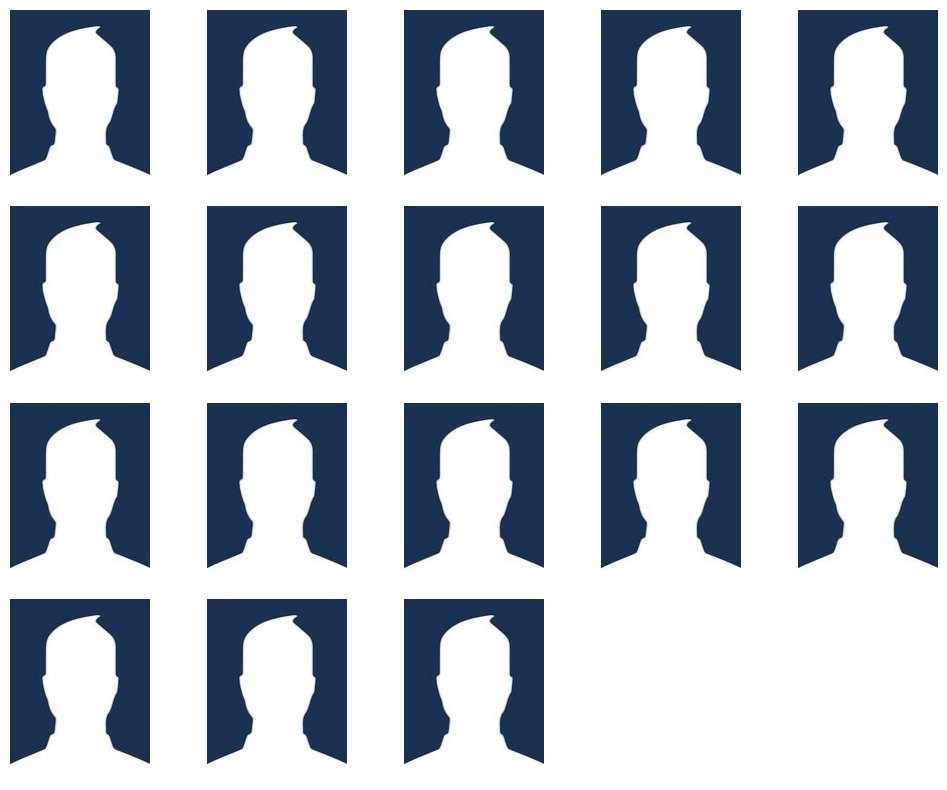

In [ ]:
import requests
from pathlib import Path
from PIL import Image
import numpy as np
import io
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Path to save images
base_dir = '/content/drive/MyDrive/Images_MachineLearning'

# Load the dataset of URLs and labels
df = pd.read_csv('/content/drive/MyDrive/model_data/images_gdrivetest.csv')

removed_images = []  # To store images considered as avatars

def is_default_avatar(image_bytes):
    try:
        image = Image.open(io.BytesIO(image_bytes))
        image_np = np.array(image.convert('RGB'))

        std_dev = image_np.std()
        if std_dev < 20:  # Adjust this threshold based on your avatars
            return True

        gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        edges = cv2.Canny(gray_image, 50, 150)  # Edge detection thresholds

        edge_count = np.count_nonzero(edges)
        total_pixels = edges.size
        edge_percentage = (edge_count / total_pixels) * 100

        if edge_percentage < 3:  # Adjust this threshold based on your avatars
            return True

        return False
    except Exception as e:
        print(f"Error processing image for avatar check: {e}")
        return False

def download_image(url, position, sub_position, index):
    response = requests.get(url)
    if response.status_code == 200:
        if is_default_avatar(response.content):
            image = Image.open(io.BytesIO(response.content))
            removed_images.append(image)  # Save the image for later review
            print(f"Skipped default avatar image at {url}")
        else:
            # Create directory if not exists
            image_dir = Path(f"{base_dir}/{position}/{sub_position}")
            image_dir.mkdir(parents=True, exist_ok=True)

            # Save the image
            image_path = image_dir / f"{index}.jpg"
            with open(image_path, 'wb') as f:
                f.write(response.content)
    else:
        print(f"Failed to download {url}: Status {response.status_code}")

def display_removed_images(images, cols=5):
    """Display images in a grid"""
    if not images:
        print("No images to display.")
        return

    n = len(images)
    rows = n // cols + (n % cols > 0)
    plt.figure(figsize=(2 * cols, 2 * rows))

    for i, image in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming DataFrame 'df' is already loaded
for idx, row in df.iterrows():
    download_image(row['image_url'], row['position'], row['sub_position'], idx)

# After all images are processed
display_removed_images(removed_images)


In [ ]:
import requests
from pathlib import Path
from PIL import Image
import numpy as np
import io
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Path to save images
base_dir = '/content/drive/MyDrive/Images_MachineLearning'

# Load the dataset of URLs and labels
df = pd.read_csv('/content/drive/MyDrive/model_data/images_all.csv')

removed_images = []  # To store images considered as avatars

def is_default_avatar(image_bytes):
    try:
        image = Image.open(io.BytesIO(image_bytes))
        image_np = np.array(image.convert('RGB'))

        std_dev = image_np.std()
        if std_dev < 20:  # Adjust this threshold based on your avatars
            return True

        gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        edges = cv2.Canny(gray_image, 50, 150)  # Edge detection thresholds

        edge_count = np.count_nonzero(edges)
        total_pixels = edges.size
        edge_percentage = (edge_count / total_pixels) * 100

        if edge_percentage < 3:  # Adjust this threshold based on your avatars
            return True

        return False
    except Exception as e:
        print(f"Error processing image for avatar check: {e}")
        return False

def download_image(url, position, sub_position, index):
    response = requests.get(url)
    if response.status_code == 200:
        if is_default_avatar(response.content):
            image = Image.open(io.BytesIO(response.content))
            removed_images.append(image)  # Save the image for later review
            print(f"Skipped default avatar image at {url}")
        else:
            # Create directory if not exists
            image_dir = Path(f"{base_dir}/{position}/{sub_position}")
            image_dir.mkdir(parents=True, exist_ok=True)

            # Save the image
            image_path = image_dir / f"{index}.jpg"
            with open(image_path, 'wb') as f:
                f.write(response.content)
    else:
        print(f"Failed to download {url}: Status {response.status_code}")



# Assuming DataFrame 'df' is already loaded
for idx, row in df.iterrows():
    download_image(row['image_url'], row['position'], row['sub_position'], idx)



Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1
Skipped default avatar image at https://img.a.transfermarkt.tech

SSLError: HTTPSConnectionPool(host='img.a.transfermarkt.technology', port=443): Max retries exceeded with url: /portrait/header/164015-1676529817.jpg?lm=1 (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1007)')))

In [ ]:
def display_removed_images(images, cols=30):
    """Display images in a grid"""
    if not images:
        print("No images to display.")
        return

    n = len(images)
    rows = n // cols + (n % cols > 0)
    plt.figure(figsize=(2 * cols, 2 * rows))

    for i, image in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
# After all images are processed
display_removed_images(removed_images)

In [ ]:
from pathlib import Path

# Path to the directory where images are saved
base_dir = Path('/content/drive/MyDrive/Images_MachineLearning')

def count_images_by_class(base_directory):
    class_counts = {}
    # Iterate through each class directory in the base directory
    for class_dir in base_directory.iterdir():
        if class_dir.is_dir():  # Ensure it's a directory
            for sub_class_dir in class_dir.iterdir():
                if sub_class_dir.is_dir():  # Ensure it's a directory
                    # Count all .jpg images in this subclass directory
                    count = sum(1 for _ in sub_class_dir.glob('*.jpg'))
                    # Store the count with the class/subclass as the key
                    class_counts[f"{class_dir.name}/{sub_class_dir.name}"] = count
    return class_counts

# Call the function and store the results
image_counts = count_images_by_class(base_dir)

# Print the counts for each class and subclass
for class_subclass, count in image_counts.items():
    print(f"{class_subclass}: {count} images")


Attack/Centre-Forward: 1425 images
Attack/Left Winger: 432 images
Attack/Second Striker: 94 images
Attack/Right Winger: 443 images
Goalkeeper/Goalkeeper: 1075 images
Defender/Centre-Back: 1784 images
Defender/Left-Back: 594 images
Defender/Right-Back: 675 images
Midfield/Attacking Midfield: 618 images
Midfield/Central Midfield: 959 images
Midfield/Defensive Midfield: 867 images
Midfield/Left Midfield: 117 images
Midfield/Right Midfield: 98 images
Missing/nan: 21 images


In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random

def display_random_samples(base_directory, samples_per_class=100, cols=10):
    base_path = Path(base_directory)
    classes = [d for d in base_path.iterdir() if d.is_dir()]

    if not classes:
        print("No class directories found.")
        return

    # Create a subplot grid
    fig, ax_arr = plt.subplots(nrows=len(classes), ncols=cols, figsize=(cols * 2, len(classes) * 2))

    # If there's only one class, ax_arr may not be an array of arrays
    if len(classes) == 1:
        ax_arr = [ax_arr]  # Make it a list of arrays for consistency

    for ax_row, class_dir in zip(ax_arr, classes):
        image_files = list(class_dir.rglob('*.jpg'))
        if not image_files:
            print(f"No images found in {class_dir.name}.")
            continue

        random_samples = random.sample(image_files, min(samples_per_class, len(image_files)))

        for ax, img_path in zip(ax_row, random_samples):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{class_dir.name}")

    plt.tight_layout()
    plt.show()

# Example usage
base_dir = '/content/drive/MyDrive/Images_MachineLearning'
display_random_samples(base_dir, samples_per_class=100, cols=20)


In [ ]:
import pandas as pd
import requests
from pathlib import Path

# Path to save images
base_dir = '/content/drive/MyDrive/Images_MachineLearning'

# Load the dataset of URLs and labels (update the path to where you uploaded your CSV)
df = pd.read_csv('/content/drive/MyDrive/model_data/images_gdrivetest.csv')

# Function to download an image and save it in the appropriate directory
def download_image(url, category, index):
    response = requests.get(url)
    if response.status_code == 200:
        image_dir = Path(f'{base_dir}/{category}')
        image_dir.mkdir(parents=True, exist_ok=True)
        image_path = image_dir / f'{index}.jpg'
        with open(image_path, 'wb') as f:
            f.write(response.content)
    else:
        print(f"Failed to download {url}: Status {response.status_code}")

# Download images
for idx, row in df.iterrows():
    download_image(row['image_url'], row['position'], idx)


In [7]:
pip install tensorflow numpy matplotlib scikit-learn


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import numpy as np
import os

# Base directory
base_dir = '/content/drive/MyDrive/Images_MachineLearning'

# Creating ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # using 20% of the data for validation
)

# Generator for training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Generator for validation data
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 7364 images belonging to 5 classes.
Found 1838 images belonging to 5 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])


In [1]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


NameError: name 'model' is not defined

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Images_MachineLearning'))


['Data']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the image data generator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.35)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Images_MachineLearning/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Images_MachineLearning/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Build the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=10)


Found 3286 images belonging to 14 classes.
Found 1767 images belonging to 14 classes.
Epoch 1/10
103/103 [==============================] - 222s 2s/step - loss: 2.6005 - accuracy: 0.0852 - val_loss: 2.5567 - val_accuracy: 0.0815
Epoch 2/10
103/103 [==============================] - 232s 2s/step - loss: 2.5676 - accuracy: 0.0870 - val_loss: 2.5544 - val_accuracy: 0.0855
Epoch 3/10
103/103 [==============================] - 232s 2s/step - loss: 2.5557 - accuracy: 0.0889 - val_loss: 2.5542 - val_accuracy: 0.0905
Epoch 4/10
103/103 [==============================] - 231s 2s/step - loss: 2.5425 - accuracy: 0.1013 - val_loss: 2.5557 - val_accuracy: 0.0985
Epoch 5/10
103/103 [==============================] - 218s 2s/step - loss: 2.5218 - accuracy: 0.1141 - val_loss: 2.5659 - val_accuracy: 0.0894
Epoch 6/10
103/103 [==============================] - 231s 2s/step - loss: 2.4730 - accuracy: 0.1363 - val_loss: 2.6197 - val_accuracy: 0.0798
Epoch 7/10
103/103 [==============================] - 22

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.save('/content/drive/MyDrive/Models/footballer_position_model.keras')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/Models/footballer_position_model.keras')


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
103/103 [==============================] - 238s 2s/step - loss: 0.9542 - accuracy: 0.6835 - val_loss: 4.4107 - val_accuracy: 0.0741
Epoch 2/10
103/103 [==============================] - 224s 2s/step - loss: 0.7697 - accuracy: 0.7584 - val_loss: 4.8858 - val_accuracy: 0.0832
Epoch 3/10
103/103 [==============================] - 229s 2s/step - loss: 0.6297 - accuracy: 0.7961 - val_loss: 5.6986 - val_accuracy: 0.0798
Epoch 4/10
103/103 [==============================] - 231s 2s/step - loss: 0.5672 - accuracy: 0.8113 - val_loss: 6.5254 - val_accuracy: 0.0911
Epoch 5/10
103/103 [==============================] - 223s 2s/step - loss: 0.5319 - accuracy: 0.8214 - val_loss: 6.1873 - val_accuracy: 0.0900
Epoch 6/10
103/103 [==============================] - 240s 2s/step - loss: 0.5141 - accuracy: 0.8305 - val_loss: 6.0580 - val_accuracy: 0.0877
Epoch 7/10
103/103 [==============================] - 217s 2s/step - loss: 0.4993 - accuracy: 0.8329 - val_loss: 6.2092 - val_accuracy: 0.0934

In [ ]:
print(history.history.keys())


NameError: name 'history' is not defined

In [ ]:
model.save('/content/drive/MyDrive/Models/footballer_position_model2.keras')


In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history['acc'])  # Change 'accuracy' to 'acc'
plt.plot(history['val_acc'])  # Change 'val_accuracy' to 'val_acc'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


TypeError: 'History' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt

history = model.history.history

# Summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


KeyError: 'accuracy'

In [ ]:


new_model = tf.keras.models.load_model('/content/saved_model/berg_makela_hakli_pol_model2023')
new_model.summary()

In [ ]:
!pip install Pillow

In [ ]:
import urllib.request
import cv2
import numpy as np


In [ ]:
url = 'https://img.a.transfermarkt.technology/portrait/header/741238-1646905031.jpg?lm=1'
url_response = urllib.request.urlopen(url)
print(url_response)

In [ ]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt

url = 'https://img.a.transfermarkt.technology/portrait/header/741238-1646905031.jpg?lm=1'
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # Use cv2.IMREAD_COLOR to explicitly specify the mode

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use matplotlib to display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()
